## Rekayasa Perangkat Lunak Menggunakan SKLearn, TFID-Vectorizer, dan Algoritma Passive Aggressive Classifier

Diajukan untuk Tugas Ujian Akhir Semester mata kuliah Rekasaya Perangkat Lunak Lanjut

Disusun oleh:
* 2021130019 - Nathanael Ferry Pratama
* 2021130021 - Jevon Ivander Juandy






In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Membaca data
dataframenya = pd.read_excel('data_indonesia/dataset_full.xlsx')

# Menampilkan shape dan lima baris pertama dalam dataset
print("shape : ", dataframenya.shape)
dataframenya.head()

shape :  (26847, 4)


,Unnamed: 0,title,text_new,label
0,337,BERITA FOTO: Megawati Pidato di HUT Ke-50 PDI ...,BERITA FOTO Megawati Pidato di HUT Ke50 PDI Pe...,REAL
1,1221,[SALAH] “Kadrun adalah sebutan PKI tahun 1960a...,Kadrun kadal gurun adalah sebutan PKIkomunis t...,FAKE
2,9870,[HOAX] Shinta Nuriyah Dikatakan Berkomentar So...,Wahai Saudaraku Barisan Ansor Barisan yang sel...,FAKE
3,3150,Survei Indikator: Kepuasan Publik Atas Kinerja...,Survei Indikator Kepuasan Publik Atas Kinerja ...,REAL
4,721,[SALAH]: Puluhan Orang Cidera Parah Gas Air Ma...,BERITA TERKINI APARAT BIADAP PULUHAN JADI KORB...,FAKE


In [3]:
# Menampilkan label-labelnya
labels = dataframenya.label
labels.head()

0    REAL
1    FAKE
2    FAKE
3    REAL
4    FAKE
Name: label, dtype: object

In [4]:
# Menampilkan title
titles = dataframenya.title
titles.head()

0    BERITA FOTO: Megawati Pidato di HUT Ke-50 PDI ...
1    [SALAH] “Kadrun adalah sebutan PKI tahun 1960a...
2    [HOAX] Shinta Nuriyah Dikatakan Berkomentar So...
3    Survei Indikator: Kepuasan Publik Atas Kinerja...
4    [SALAH]: Puluhan Orang Cidera Parah Gas Air Ma...
Name: title, dtype: object

In [5]:
# Split dataset menjadi training dan testing sets
x_train, x_test, y_train, y_test = train_test_split(dataframenya['text_new'], labels, test_size=0.2, random_state=7)

In [6]:
# Daftar kata-kata "stop words" dalam bahasa Indonesia
stop_words_indonesia = ["dan", "di", "ke", "dari", "untuk", "adalah", "pada", "dalam", "itu", "dengan", "atau", "oleh", "yang", "saya", "kita", "mereka", "kamu", "akan", "juga", "bagi", "namun", "apakah", "mengapa", "ketika", "sehingga", "hanya", "belum", "lagi", "sudah", "tapi", "kami", "anda", "ia", "kini", "saja", "boleh", "bolehkah", "harus", "perlu", "mesti", "bisa", "dapat", "masih", "tidak", "ya", "tidak", "iya", "ya", "tentang", "menurut", "menjadi", "kemudian", "begini", "begitu", "setelah", "sebelum", "hingga", "serta", "itulah", "padahal", "tetapi", "jika", "sebab", "karena", "maka", "kemudian", "tadinya", "sambil", "kecuali", "supaya", "meskipun", "sebab", "kalau", "apabila", "meski", "walaupun", "bagaimana", "beginilah", "beginikan", "selama", "paling", "lebih", "setiap", "hampir", "terlalu", "mungkin", "sedikit", "justru", "bahkan", "sering", "biasanya", "saja", "cuma", "malah", "baru", "seperti", "tersebut", "ingin", "boleh", "tidak", "belumlah", "tapi", "sudahlah", "ya", "mari", "ayo", "hayo", "hanya", "saja", "lagi", "nanti", "setelah", "besok", "siang", "malam", "minggu", "bulan", "tahun", "yang", "ini", "itu", "anu", "deh", "banget", "dong", "nongkrong", "udah", "belom", "masuk", "kemana", "nanya", "berapa", "sih", "dong", "ngejar", "serius", "lho", "loh", "katanya", "lah", "kan", "nggak", "gimana", "ngga", "duh", "yo", "bang", "bro", "pa", "mbak", "mas", "mbak", "dok", "suster", "dr"]

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_indonesia, max_df=0.7)

# Fit dan transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [7]:
# Inisialisasi PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Prediksi test set dan kalkulasi keakuratan
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Akurasi : {round(score*100,2)}%')

Akurasi : 98.58%


[[1204   46]
 [  30 4090]]


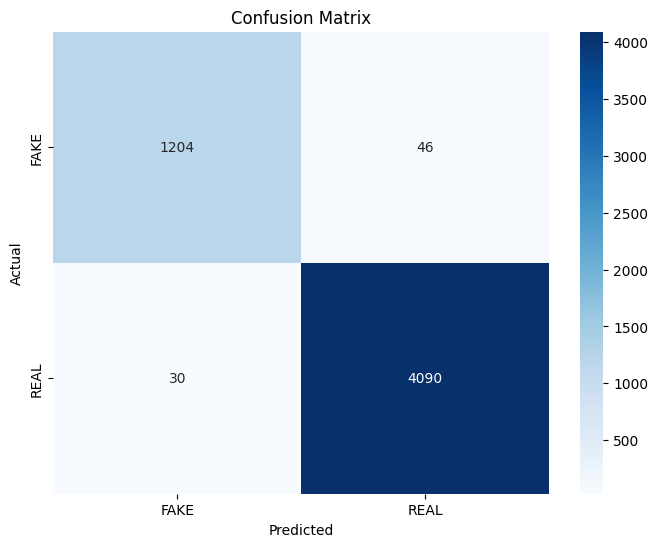

In [8]:
# Membuat confusion matrix
cm = confusion_matrix(y_test,y_pred, labels = ['FAKE','REAL'])
print(cm)

# Visualisasi menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Membuat DataFrame baru untuk data testing
testing_data = x_test.to_frame()
testing_data['actual_label'] = y_test
testing_data['predicted_label'] = y_pred

# Filter data 'FAKE' dan 'REAL'
fake_data = testing_data[testing_data['predicted_label'] == 'FAKE']
real_data = testing_data[testing_data['predicted_label'] == 'REAL']

# Ekspor Data ke CSV
fake_data.to_csv('data_indonesia/fake_data_predicted.csv', index=False)
real_data.to_csv('data_indonesia/real_data_predicted.csv', index=False)

In [10]:
# news_headline = 'Nomor IMEI di Ponsel Bisa Disadap Polisi'
# data = tfidf_vectorizer.transform([news_headline]).toarray()
# print(pac.predict(data))


In [11]:
# Simpan model ke file
model_filename = 'data_indonesia_model/model_hoax_detection.pkl'
joblib.dump(pac, model_filename)

['data_indonesia_model/model_hoax_detection.pkl']

In [12]:
# Simpan TfidfVectorizer ke file
vectorizer_filename = 'data_indonesia_model/tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, vectorizer_filename)

['data_indonesia_model/tfidf_vectorizer.pkl']